--------------------------------------------------------------------------------------------------------------------------------
# Clustering Algorithms

--------------------------------------------------------------------------------------------------------------------------------
#### Things you would learn:

    Use of Hierarchical Clustering 

    Use of various functions within Hierarchical Clustering (euclidean, agglomerative, kmeans)

    Use of Downsampling (index)

    Use of grid_to_graph, shuffle functions

    Constructing a function to plot kmeans & random clusters using an image  

    Function deconstruction ( step by step) 
    

##### Duration of excercise : 45min - 90min
    
--------------------------------------------------------------------------------------------------------------------------------    

### Hierarchical clustering applied to image processing

In [2]:
# importing the packages required

import time as time
import numpy as np
import scipy as sp
import pylab as pl
from sklearn.feature_extraction.image import grid_to_graph
#from sklearn.cluster import ward_tree  
from sklearn.cluster import KMeans
from sklearn.metrics import euclidean_distances
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from sklearn.cluster import AgglomerativeClustering

In [3]:
lena = sp.misc.face()
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.face.html

lena

array([[[121, 112, 131],
        [138, 129, 148],
        [153, 144, 165],
        ..., 
        [119, 126,  74],
        [131, 136,  82],
        [139, 144,  90]],

       [[ 89,  82, 100],
        [110, 103, 121],
        [130, 122, 143],
        ..., 
        [118, 125,  71],
        [134, 141,  87],
        [146, 153,  99]],

       [[ 73,  66,  84],
        [ 94,  87, 105],
        [115, 108, 126],
        ..., 
        [117, 126,  71],
        [133, 142,  87],
        [144, 153,  98]],

       ..., 
       [[ 87, 106,  76],
        [ 94, 110,  81],
        [107, 124,  92],
        ..., 
        [120, 158,  97],
        [119, 157,  96],
        [119, 158,  95]],

       [[ 85, 101,  72],
        [ 95, 111,  82],
        [112, 127,  96],
        ..., 
        [121, 157,  96],
        [120, 156,  94],
        [120, 156,  94]],

       [[ 85, 101,  74],
        [ 97, 113,  84],
        [111, 126,  97],
        ..., 
        [120, 156,  95],
        [119, 155,  93],
        [118, 154,

In [4]:
lena[::1,::1]

array([[[121, 112, 131],
        [138, 129, 148],
        [153, 144, 165],
        ..., 
        [119, 126,  74],
        [131, 136,  82],
        [139, 144,  90]],

       [[ 89,  82, 100],
        [110, 103, 121],
        [130, 122, 143],
        ..., 
        [118, 125,  71],
        [134, 141,  87],
        [146, 153,  99]],

       [[ 73,  66,  84],
        [ 94,  87, 105],
        [115, 108, 126],
        ..., 
        [117, 126,  71],
        [133, 142,  87],
        [144, 153,  98]],

       ..., 
       [[ 87, 106,  76],
        [ 94, 110,  81],
        [107, 124,  92],
        ..., 
        [120, 158,  97],
        [119, 157,  96],
        [119, 158,  95]],

       [[ 85, 101,  72],
        [ 95, 111,  82],
        [112, 127,  96],
        ..., 
        [121, 157,  96],
        [120, 156,  94],
        [120, 156,  94]],

       [[ 85, 101,  74],
        [ 97, 113,  84],
        [111, 126,  97],
        ..., 
        [120, 156,  95],
        [119, 155,  93],
        [118, 154,

In [5]:
len(lena[0::1, ::1])

768

In [6]:
## Downsampling

lena = lena[::1, ::1] + lena[0::1, ::1] + lena[::1, 0::1] + lena[0::1, 0::1]
lena




array([[[228, 192,  12],
        [ 40,   4,  80],
        [100,  64, 148],
        ..., 
        [220, 248,  40],
        [ 12,  32,  72],
        [ 44,  64, 104]],

       [[100,  72, 144],
        [184, 156, 228],
        [  8, 232,  60],
        ..., 
        [216, 244,  28],
        [ 24,  52,  92],
        [ 72, 100, 140]],

       [[ 36,   8,  80],
        [120,  92, 164],
        [204, 176, 248],
        ..., 
        [212, 248,  28],
        [ 20,  56,  92],
        [ 64, 100, 136]],

       ..., 
       [[ 92, 168,  48],
        [120, 184,  68],
        [172, 240, 112],
        ..., 
        [224, 120, 132],
        [220, 116, 128],
        [220, 120, 124]],

       [[ 84, 148,  32],
        [124, 188,  72],
        [192, 252, 128],
        ..., 
        [228, 116, 128],
        [224, 112, 120],
        [224, 112, 120]],

       [[ 84, 148,  40],
        [132, 196,  80],
        [188, 248, 132],
        ..., 
        [224, 112, 124],
        [220, 108, 116],
        [216, 104,

In [7]:
X = np.reshape(lena, (-1, 1))
X

array([[228],
       [192],
       [ 12],
       ..., 
       [216],
       [104],
       [112]], dtype=uint8)

In [8]:
connectivity = grid_to_graph(*lena.shape)  # sklearn.feature_extraction.image.grid_to_graph
connectivity                               #Graph of the pixel-to-pixel connections



<2359296x2359296 sparse matrix of type '<class 'numpy.int32'>'
	with 14931456 stored elements in COOrdinate format>

URLS : http://scikit-learn.org/0.15/modules/generated/sklearn.cluster.Ward.html
       http://scikit-learn.org/0.15/auto_examples/cluster/plot_lena_ward_segmentation.html



In [ ]:
print("Compute structured hierarchical clustering...")
st = time.time()
n_clusters = 5  # number of regions
ward = AgglomerativeClustering(n_clusters=n_clusters,
        linkage='ward', connectivity=connectivity).fit(X)
label = np.reshape(ward.labels_, lena.shape)
print("Elapsed time: ", time.time() - st)
print("Number of pixels: ", label.size)
print("Number of clusters: ", np.unique(label).size)

Compute structured hierarchical clustering...


In [ ]:
st = time.time()
n_clusters = 5  # number of regions
ward = AgglomerativeClustering(n_clusters=n_clusters,
        linkage='ward', connectivity=connectivity).fit(X)

#label = np.reshape(ward.labels_, lena.shape)
plt.figure(1,figsize=(5, 5))
plt.imshow(lena,cmap=pl.cm.gray); pl.xticks(()); pl.yticks(())

plt.figure(2,figsize=(5, 5))
plt.imshow(lena); pl.xticks(()); pl.yticks(())
plt.figure(3,figsize=(5, 5))
plt.imshow(lena, cmap=pl.cm.gray)

for l in range(n_clusters):
    pl.contour(label == l, contours=1,colors=[pl.cm.spectral(l / float(n_clusters)), ])
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
n_colors = 64   # having 64 colors on the image

china = load_sample_image("china.jpg")
china

In [22]:
china = np.array(china, dtype=np.float64) / 255 # # Convert to floats instead of the default 8 bits integer coding.
# Dividing by 255 is important so that pl.imshow behaves works well on float data (need to be in the range [0-1])
china

array([[[ 0.68235294,  0.78823529,  0.90588235],
        [ 0.68235294,  0.78823529,  0.90588235],
        [ 0.68235294,  0.78823529,  0.90588235],
        ..., 
        [ 0.98039216,  0.98431373,  1.        ],
        [ 0.98039216,  0.98431373,  1.        ],
        [ 0.98039216,  0.98431373,  1.        ]],

       [[ 0.6745098 ,  0.78039216,  0.89803922],
        [ 0.67843137,  0.78431373,  0.90196078],
        [ 0.67843137,  0.78431373,  0.90196078],
        ..., 
        [ 0.98431373,  0.98823529,  1.        ],
        [ 0.98431373,  0.98823529,  1.        ],
        [ 0.98431373,  0.98823529,  1.        ]],

       [[ 0.68235294,  0.78823529,  0.90588235],
        [ 0.68235294,  0.78823529,  0.90588235],
        [ 0.68235294,  0.78823529,  0.90588235],
        ..., 
        [ 0.98823529,  0.99215686,  1.        ],
        [ 0.98823529,  0.99215686,  1.        ],
        [ 0.98823529,  0.99215686,  1.        ]],

       ..., 
       [[ 0.34509804,  0.31372549,  0.02745098],
        

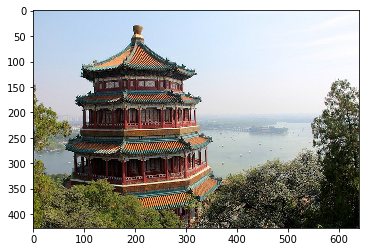

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(china)

In [24]:
china.shape

(427, 640, 3)

In [ ]:
d = china.shape[1]
d    

In [23]:
w, h, d = original_shape = tuple(china.shape)   # Load Image and transform to a 2D numpy array.
assert d == 3    # Asserting the d value
image_array = np.reshape(china, (w * h, d))
image_array

array([[ 0.68235294,  0.78823529,  0.90588235],
       [ 0.68235294,  0.78823529,  0.90588235],
       [ 0.68235294,  0.78823529,  0.90588235],
       ..., 
       [ 0.16862745,  0.19215686,  0.15294118],
       [ 0.05098039,  0.08235294,  0.02352941],
       [ 0.05882353,  0.09411765,  0.02745098]])

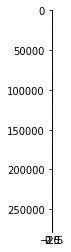

In [36]:
% matplotlib inline
plt.imshow(image_array)

In [15]:
print("Fitting model on a small sub-sample of the data")
t0 = time.time()
image_array_sample = shuffle(image_array, random_state=0)[:1000]  # Shuffle arrays or sparse matrices in a consistent way
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample) # Using Kmeans clustering 
print("done in %0.3fs." % (time.time() - t0)) # printing the time for the clustering and fitting
print(kmeans)

Fitting model on a small sub-sample of the data
done in 0.765s.
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=64, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)


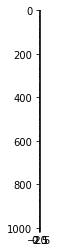

In [37]:
% matplotlib inline
plt.imshow(image_array_sample)

In [16]:
print("Predicting color indices on the full image (k-means)")
t0 = time.time()
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time.time() - t0))
print(labels)

Predicting color indices on the full image (k-means)
done in 0.371s.
[62 62 62 ...,  1  6  6]


In [17]:
codebook_random = shuffle(image_array, random_state=0)[:n_colors + 1]
print("Predicting color indices on the full image (random)")
t0 = time.time()
dist = euclidean_distances(codebook_random, image_array, squared=True)
labels_random = dist.argmin(axis=0)
print("done in %0.3fs." % (time.time() - t0))
print(dist)


Predicting color indices on the full image (random)
done in 0.727s.
[[ 0.07760092  0.07760092  0.07760092 ...,  1.73221069  2.31809304
   2.27758554]
 [ 0.84788927  0.84788927  0.84788927 ...,  0.07730873  0.20628989
   0.19355632]
 [ 0.41045752  0.41045752  0.41045752 ...,  0.22282199  0.45896194
   0.44121492]
 ..., 
 [ 0.77182622  0.77182622  0.77182622 ...,  0.14199154  0.29856209
   0.28293733]
 [ 0.03514033  0.03514033  0.03514033 ...,  1.29233372  1.80282968
   1.76650519]
 [ 0.35372549  0.35372549  0.35372549 ...,  0.26872741  0.52279892
   0.50302191]]


In [14]:
print(labels_random)

[55 55 55 ..., 52 60 60]


In [30]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image
recreate_image(kmeans.cluster_centers_, labels, 427,640 )

array([[[ 0.73524384,  0.82021116,  0.91925591],
        [ 0.73524384,  0.82021116,  0.91925591],
        [ 0.73524384,  0.82021116,  0.91925591],
        ..., 
        [ 0.97137255,  0.97615686,  0.99419608],
        [ 0.97137255,  0.97615686,  0.99419608],
        [ 0.97137255,  0.97615686,  0.99419608]],

       [[ 0.73524384,  0.82021116,  0.91925591],
        [ 0.73524384,  0.82021116,  0.91925591],
        [ 0.73524384,  0.82021116,  0.91925591],
        ..., 
        [ 0.97137255,  0.97615686,  0.99419608],
        [ 0.97137255,  0.97615686,  0.99419608],
        [ 0.97137255,  0.97615686,  0.99419608]],

       [[ 0.73524384,  0.82021116,  0.91925591],
        [ 0.73524384,  0.82021116,  0.91925591],
        [ 0.73524384,  0.82021116,  0.91925591],
        ..., 
        [ 0.97137255,  0.97615686,  0.99419608],
        [ 0.97137255,  0.97615686,  0.99419608],
        [ 0.97137255,  0.97615686,  0.99419608]],

       ..., 
       [[ 0.29467787,  0.26806723,  0.10028011],
        

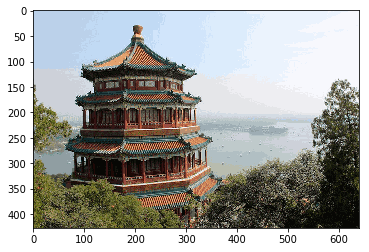

In [40]:
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

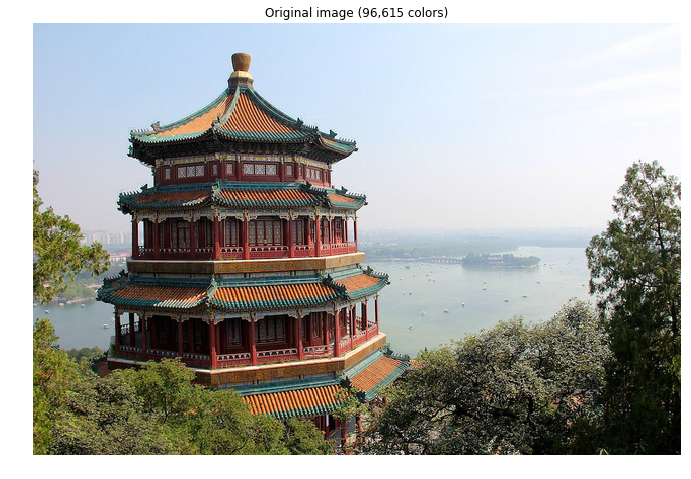

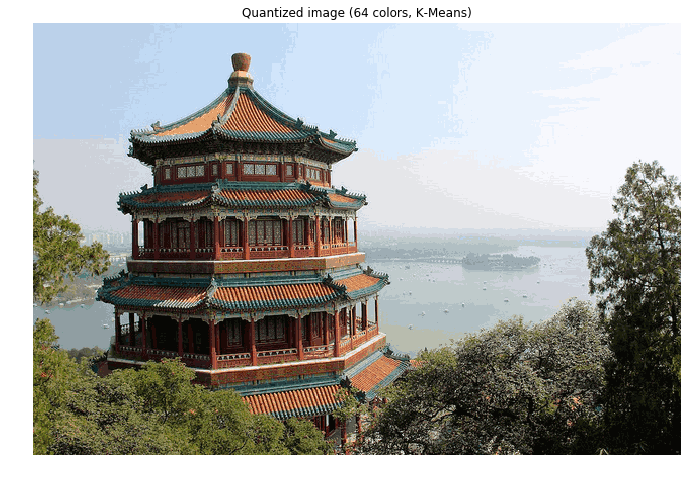

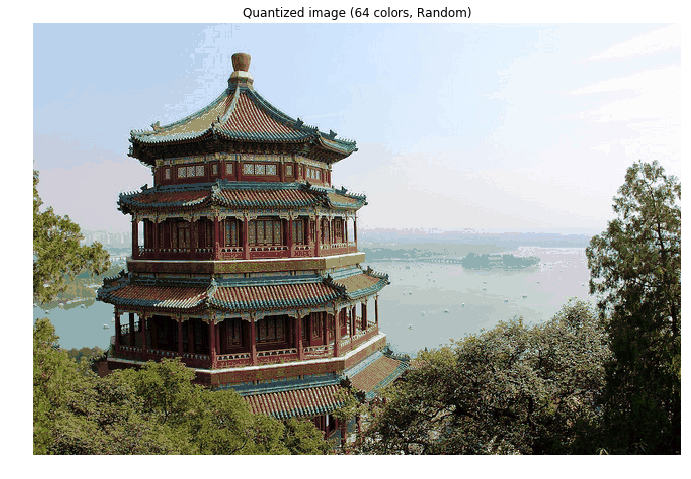

In [28]:
import matplotlib.pyplot as plt
# Display all results, alongside original image
plt.figure(1,figsize=(10, 6))
plt.clf()
ax = pl.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(china)

plt.figure(2,figsize=(10, 6))
plt.clf()
ax = pl.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image (64 colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3,figsize=(10, 6))
plt.clf()
ax = pl.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image (64 colors, Random)')
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()